Principal Components Analysis

1. Imports

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

2. Read data

In [27]:
data = pd.read_csv(
    'C:/Users/TheAncientOwl/Code/data-analysis-tool/server/Date.csv')

data.head()

,Country,EA,EAM,EAF,AFF,ANE,AME,CY,SA,CP,LA,LCP,ARL,AGL
0,Aruba,24.125617,25.060201,22.962485,10.503020,13471.23596,20695.5618,3656.505885,180.0,17824090.07,180.0,4600273.024,2000.0,20.00
1,Afghanistan,43.130001,37.259998,65.769997,22.042897,4300.00000,10450.0000,2164.900000,652860.0,4140568.00,652860.0,1912634.000,7703000.0,379190.00
2,Albania,37.290001,33.720001,42.279999,18.440931,960.00000,2010.0000,4840.500000,28750.0,678196.00,27400.0,140110.000,611346.0,11740.81
3,Andorra,24.125617,25.060201,22.962485,10.503020,0.00000,0.0000,3656.505885,470.0,17824090.07,470.0,4600273.024,830.0,188.30
4,Armenia,25.780001,23.400000,28.650000,13.942312,1070.00000,680.0000,2623.600000,29740.0,334342.00,28470.0,127436.000,445600.0,16773.00


3. Choose row names

In [28]:
row_names_col = 'Country'

4. Remove row names column

In [29]:
row_names = data[row_names_col]
data.index = row_names

data = data.drop(columns=[row_names_col])

data.head()

,EA,EAM,EAF,AFF,ANE,AME,CY,SA,CP,LA,LCP,ARL,AGL
Country,,,,,,,,,,,,,
Aruba,24.125617,25.060201,22.962485,10.503020,13471.23596,20695.5618,3656.505885,180.0,17824090.07,180.0,4600273.024,2000.0,20.00
Afghanistan,43.130001,37.259998,65.769997,22.042897,4300.00000,10450.0000,2164.900000,652860.0,4140568.00,652860.0,1912634.000,7703000.0,379190.00
Albania,37.290001,33.720001,42.279999,18.440931,960.00000,2010.0000,4840.500000,28750.0,678196.00,27400.0,140110.000,611346.0,11740.81
Andorra,24.125617,25.060201,22.962485,10.503020,0.00000,0.0000,3656.505885,470.0,17824090.07,470.0,4600273.024,830.0,188.30
Armenia,25.780001,23.400000,28.650000,13.942312,1070.00000,680.0000,2623.600000,29740.0,334342.00,28470.0,127436.000,445600.0,16773.00


5. Preprocessing

In [30]:
scaled_data = preprocessing.scale(data.T)

6. PCA

In [51]:
n_components = 7
pca = PCA(n_components)
principal_components = pca.fit_transform(scaled_data)
labels = ['PC' + str(x) for x in range(1, n_components + 1)]
pca_df = pd.DataFrame(data=principal_components, columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,-5.876653,-1.532314,-1.303081,0.481374,0.730430,-0.838672,-0.348746
1,-5.876313,-1.531360,-1.303201,0.480413,0.731679,-0.837494,-0.348165
2,-5.877248,-1.534032,-1.302684,0.483356,0.727809,-0.841067,-0.349957
3,-5.878911,-1.537919,-1.302462,0.484514,0.724425,-0.842299,-0.352172
4,-5.877396,-1.380422,-1.733369,-1.323750,-1.736534,0.083340,-0.077248
5,-5.874067,-1.301702,-1.961161,-2.301745,-3.041439,0.601835,0.098905
6,-5.165026,0.305871,-0.797028,-2.087181,3.075185,2.164290,0.212736
7,-2.193444,3.379063,6.458737,0.042703,-0.362096,0.261307,-0.455217
8,26.563572,-10.811949,1.409884,-0.918653,0.246870,-0.267434,0.023575
9,-2.361627,3.172183,6.044630,0.129669,-0.399046,-0.000076,0.016028


7. Scree plot

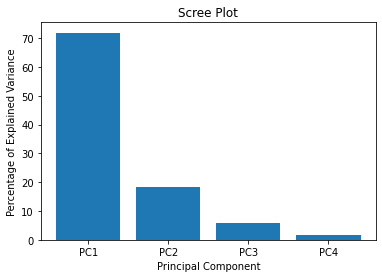

In [39]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()


8. Plots